# DEMO TFIDF FROM NOTEBOOK

Fichier chargé : C:\Users\rudy_\Documents\Datascientest\Projet Rakuten\FINALE\Preprocessing\dfs\X_test_fullpreprocessed.csv


,prdtypecode,txt_0_tok_stp_lem,txt_fr_tok_stp_lem
0,2280,"['afrique', 'contemporaine', 'ndeg', 'hiver', ...","['afrique', 'contemporain', 'ndeg', 'hiver', '..."
1,2403,"['walter', 'scott', 'oeuvres', 'complete', 'to...","['walter', 'scott', 'oeuvre', 'complete', 'tome']"
2,1140,"['vehicule', 'star', 'war', 'ast5', 'vintage',...","['vehicule', 'star', 'war', 'ast5', 'vintage',..."
3,2522,"['lindner', '2115ce', 'coin', 'case', 'nera', ...","['lindner', '2115ce', 'coffret', 'piece', 'mon..."
4,1920,"['rideau', 'oeillet', 'plastique', 'polyester'...","['rideau', 'oeillet', 'plastique', 'polyester'..."


Exemple manuel → Prédiction : 2582 → Mobilier extérieur


TF-IDF - Prédictions: 100%|██████████| 8423/8423 [00:01<00:00, 4433.15it/s]


                             precision    recall  f1-score   support

             Livre occasion       0.47      0.52      0.49       312
Jeu vidéo, accessoire tech.       0.64      0.66      0.65       249
         Accessoire Console       0.81      0.84      0.82       167
             Console de jeu       0.94      0.91      0.93        82
                   Figurine       0.75      0.76      0.75       267
           Carte Collection       0.90      0.91      0.91       395
                Jeu Plateau       0.46      0.60      0.52        77
  Jouet enfant, déguisement       0.75      0.65      0.70       485
             Jeu de société       0.50      0.55      0.53       207
                 Jouet tech       0.92      0.92      0.92       504
       Paire de chaussettes       0.87      0.87      0.87        79
    Jeu extérieur, vêtement       0.82      0.80      0.81       245
             Autour du bébé       0.77      0.75      0.76       324
         Mobilier intérieur      

,predicted_label,predicted_category
0,2280,Revues et journaux
1,2403,"Magazines, livres et BDs"
2,1140,Figurine
3,2522,Bureautique et papeterie
4,1920,Chambre


Résultats sauvegardés dans : C:\Users\rudy_\Documents\Datascientest\Projet Rakuten\FINALE\GITHUB\TFIDF SVM\resultats_predictions_tfidf.csv
Rapport de classification sauvegardé dans 'classification_report_tfidf.txt'
Matrice de confusion sauvegardée dans 'confusion_matrix_tfidf.png'


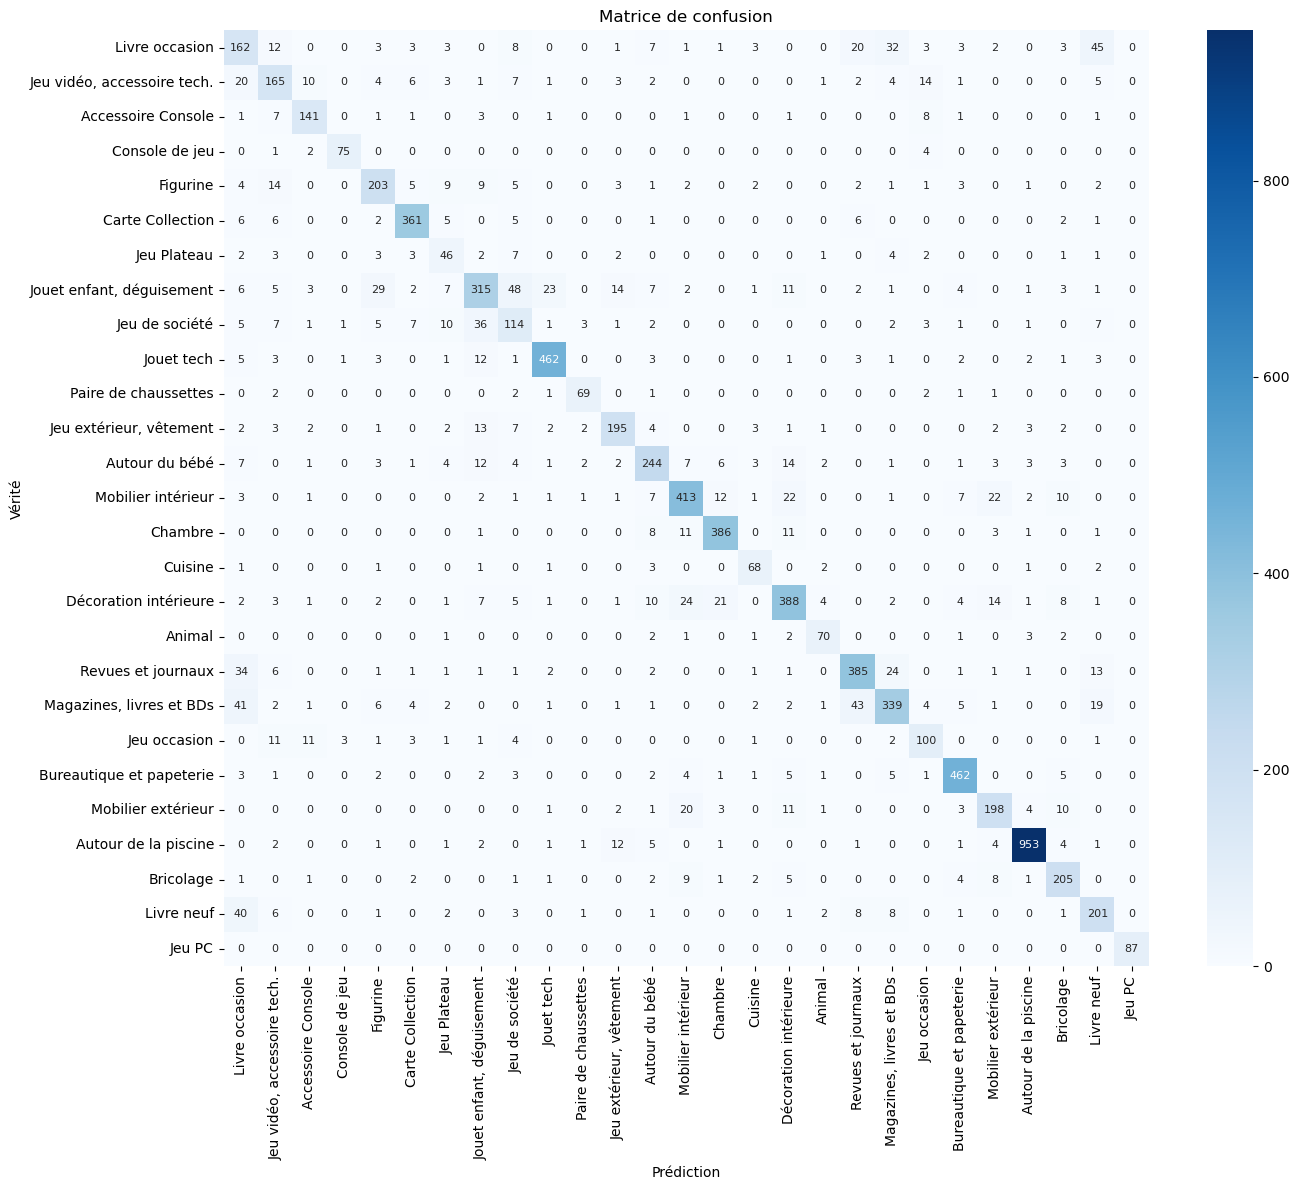

In [1]:
# === Notebook de démonstration - Prédiction texte seule avec TF-IDF + SVM ===
import pandas as pd
from tfidf_predictor import predict_text, predict_dataframe, label_to_string
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ---------------------------
# Dictionnaire label → nom de catégorie
# ---------------------------
labelcat = {
    10: "Livre occasion", 40: "Jeu vidéo, accessoire tech.", 50: "Accessoire Console",
    60: "Console de jeu", 1140: "Figurine", 1160: "Carte Collection", 1180: "Jeu Plateau",
    1280: "Jouet enfant, déguisement", 1281: "Jeu de société", 1300: "Jouet tech",
    1301: "Paire de chaussettes", 1302: "Jeu extérieur, vêtement", 1320: "Autour du bébé",
    1560: "Mobilier intérieur", 1920: "Chambre", 1940: "Cuisine", 2060: "Décoration intérieure",
    2220: "Animal", 2280: "Revues et journaux", 2403: "Magazines, livres et BDs",
    2462: "Jeu occasion", 2522: "Bureautique et papeterie", 2582: "Mobilier extérieur",
    2583: "Autour de la piscine", 2585: "Bricolage", 2705: "Livre neuf", 2905: "Jeu PC"
}

# ---------------------------
# Paramètres à personnaliser
# ---------------------------
csv_path = r"C:\Users\rudy_\Documents\Datascientest\Projet Rakuten\FINALE\Preprocessing\dfs\X_test_fullpreprocessed.csv"
text_input = "Chaise pliante pour jardin en métal noir"
save_dir = r"C:\Users\rudy_\Documents\Datascientest\Projet Rakuten\FINALE\GITHUB\TFIDF SVM"
os.makedirs(save_dir, exist_ok=True)

# ---------------------------
# Chargement du DataFrame
# ---------------------------
try:
    df = pd.read_csv(csv_path)
    print("Fichier chargé :", csv_path)
    display(df.head())
except Exception as e:
    print("Erreur lors du chargement :", e)

# ---------------------------
# Exemple de prédiction manuelle
# ---------------------------
try:
    pred = predict_text(text_input)
    print(f"Exemple manuel → Prédiction : {pred} → {label_to_string(pred)}")
except Exception as e:
    print("Erreur lors de la prédiction manuelle :", e)

# ---------------------------
# Prédiction sur le DataFrame complet
# ---------------------------
try:
    df_results = predict_dataframe(df, text_col="txt_0_tok_stp_lem")
    print("Prédictions terminées")
    display(df_results[["predicted_label", "predicted_category"]].head())

    df_results["predicted_category_name"] = df_results["predicted_label"].map(labelcat)

    # Sauvegarde des résultats
    result_path = os.path.join(save_dir, "resultats_predictions_tfidf.csv")
    df_results.to_csv(result_path, index=False)
    print("Résultats sauvegardés dans :", result_path)

    # Évaluation si vraies catégories disponibles
    if "prdtypecode" in df_results.columns:
        df_results["prdtypecode"] = df_results["prdtypecode"].astype(int)
        df_results["predicted_label"] = df_results["predicted_label"].astype(int)

        unique_labels = sorted(df_results["prdtypecode"].unique())
        label_names = [labelcat.get(lbl, str(lbl)) for lbl in unique_labels]

        report = classification_report(
            df_results["prdtypecode"],
            df_results["predicted_label"],
            target_names=label_names,
            zero_division=0
        )
        with open(os.path.join(save_dir, "classification_report_tfidf.txt"), "w", encoding="utf-8") as f:
            f.write(report)
        print("Rapport de classification sauvegardé dans 'classification_report_tfidf.txt'")

        cm = confusion_matrix(df_results["prdtypecode"], df_results["predicted_label"], labels=unique_labels)
        plt.figure(figsize=(14, 12))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=label_names, yticklabels=label_names,
                    annot_kws={"size": 8})
        plt.title("Matrice de confusion")
        plt.xlabel("Prédiction")
        plt.ylabel("Vérité")
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.tight_layout()
        cm_path = os.path.join(save_dir, "confusion_matrix_tfidf.png")
        plt.savefig(cm_path)
        print("Matrice de confusion sauvegardée dans 'confusion_matrix_tfidf.png'")

except Exception as e:
    print("Erreur pendant la prédiction sur le DataFrame :", e)